### **Loading the data and libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [3]:
sixcrypto = pd.read_csv(r"C:\Users\sahmed\Desktop\Shahzad\DS\CIND 820\Shahzad/sixcrypto.csv") 
df=pd.DataFrame(sixcrypto)

## **Time-Series Forecasting-Simple Moving Average(SMA)**

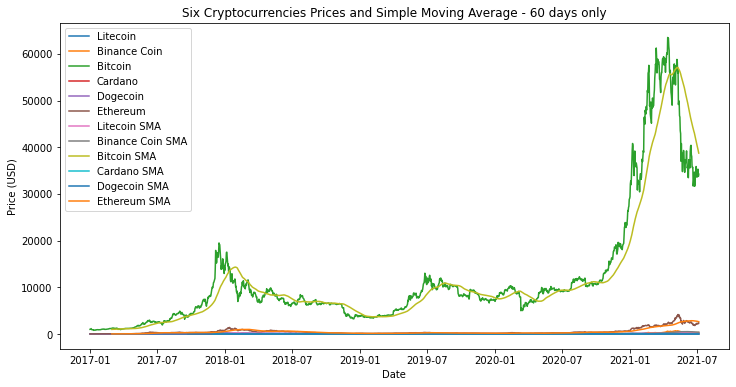

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Calculate the 30-day Simple Moving Average (SMA) for each currency
sma_litecoin = df_litecoin['Close'].rolling(window=60).mean()
sma_binance = df_binance['Close'].rolling(window=60).mean()
sma_bitcoin = df_bitcoin['Close'].rolling(window=60).mean()
sma_cardano = df_cardano['Close'].rolling(window=60).mean()
sma_dogecoin = df_dogecoin['Close'].rolling(window=60).mean()
sma_ethereum = df_ethereum['Close'].rolling(window=60).mean()

# Plot the time series data and the SMA for each currency in one figure
plt.figure(figsize=(12, 6))
plt.plot(df_litecoin['Close'], label='Litecoin')
plt.plot(df_binance['Close'], label='Binance Coin')
plt.plot(df_bitcoin['Close'], label='Bitcoin')
plt.plot(df_cardano['Close'], label='Cardano')
plt.plot(df_dogecoin['Close'], label='Dogecoin')
plt.plot(df_ethereum['Close'], label='Ethereum')
plt.plot(sma_litecoin, label='Litecoin SMA')
plt.plot(sma_binance, label='Binance Coin SMA')
plt.plot(sma_bitcoin, label='Bitcoin SMA')
plt.plot(sma_cardano, label='Cardano SMA')
plt.plot(sma_dogecoin, label='Dogecoin SMA')
plt.plot(sma_ethereum, label='Ethereum SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Six Cryptocurrencies Prices and Simple Moving Average - 60 days only')
plt.legend()
plt.show()

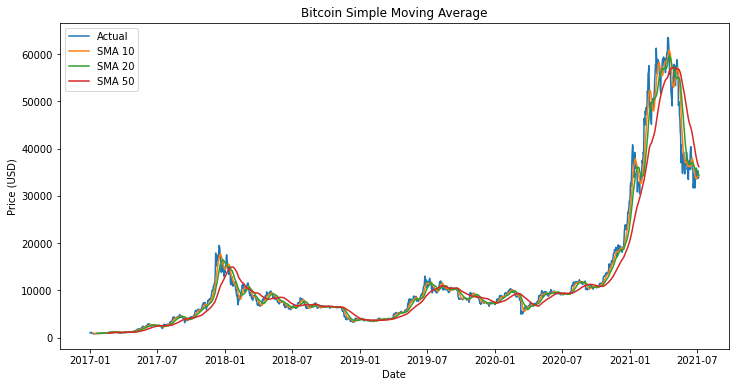

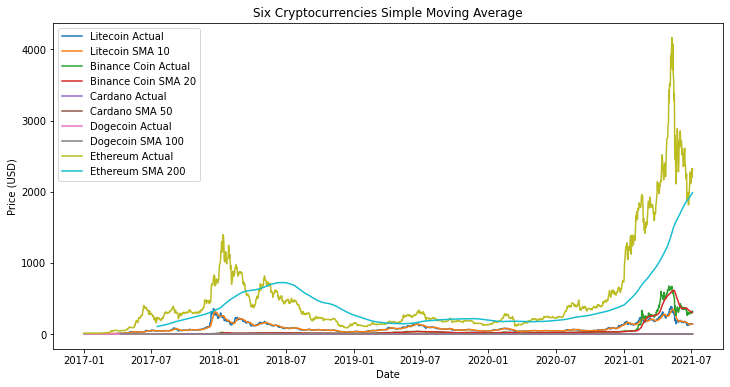

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a custom date parser function
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%y')

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma

# Calculate Simple Moving Averages for Bitcoin
sma_10 = calculate_sma(df_bitcoin['Close'], 10)
sma_20 = calculate_sma(df_bitcoin['Close'], 20)
sma_50 = calculate_sma(df_bitcoin['Close'], 50)

# Plot the Simple Moving Averages and Actual Prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin['Close'], label='Actual')
plt.plot(sma_10, label='SMA 10')
plt.plot(sma_20, label='SMA 20')
plt.plot(sma_50, label='SMA 50')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Simple Moving Average')
plt.legend()
plt.show()

# Calculate Simple Moving Averages for other cryptocurrencies
sma_10 = calculate_sma(df_litecoin['Close'], 10)
sma_20 = calculate_sma(df_binance['Close'], 20)
sma_50 = calculate_sma(df_cardano['Close'], 50)
sma_100 = calculate_sma(df_dogecoin['Close'], 100)
sma_200 = calculate_sma(df_ethereum['Close'], 200)

# Plot the Simple Moving Averages and Actual Prices for other cryptocurrencies
plt.figure(figsize=(12, 6))
plt.plot(df_litecoin['Close'], label='Litecoin Actual')
plt.plot(sma_10, label='Litecoin SMA 10')
plt.plot(df_binance['Close'], label='Binance Coin Actual')
plt.plot(sma_20, label='Binance Coin SMA 20')
plt.plot(df_cardano['Close'], label='Cardano Actual')
plt.plot(sma_50, label='Cardano SMA 50')
plt.plot(df_dogecoin['Close'], label='Dogecoin Actual')
plt.plot(sma_100, label='Dogecoin SMA 100')
plt.plot(df_ethereum['Close'], label='Ethereum Actual')
plt.plot(sma_200, label='Ethereum SMA 200')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Six Cryptocurrencies Simple Moving Average')
plt.legend()
plt.show()


### **Evaluation of SMA Model**

In [4]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('sixcrypto.csv')

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma

# Define a dictionary to store the results for each currency
results = {}

# Calculate Simple Moving Averages and errors for each currency
for symbol in df['Symbol'].unique():
    df_curr = df[df['Symbol'] == symbol]
    sma_10 = calculate_sma(df_curr['Close'], 10)
    mse = np.mean((sma_10 - df_curr['Close']) ** 2)
    mae = np.mean(abs(sma_10 - df_curr['Close']))
    results[symbol] = {'MSE': mse, 'MAE': mae}

# Print out the results in a tabular format
print("{:<15} {:<15} {:<15}".format('Currency', 'MSE', 'MAE'))
for symbol in results:
    print("{:<15} {:<15.10f} {:<15.10f}".format(symbol, results[symbol]['MSE'], results[symbol]['MAE']))

Currency        MSE             MAE            
LTC             205.4068753610  7.0718967543   
ADA             0.0038067931    0.0252276064   
BNB             310.4988753918  4.7938213184   
DOGE            0.0003538886    0.0034755278   
ETH             8648.5284246051 39.6044343466  
BTC             1865928.1037024604 682.9489892024 


### **Corrlation of Prdicted and Actual value of SMA Model**

In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df1 = pd.read_csv('sixcrypto.csv')

# Define window size for SMA
window_size = 60

# Create a dictionary to store correlation coefficients for each currency
corr_dict = {}

# Iterate over each currency in the dataset
for currency in df1['Symbol'].unique():
    
    # Select rows for the current currency
    curr_df = df1[df1['Symbol'] == currency].copy()
    
    # Calculate the SMA with window size of 60 days
    curr_df['SMA'] = curr_df['Close'].rolling(window_size).mean()

    # Generate predicted prices using SMA
    curr_df['Predicted'] = curr_df['SMA'].shift(1)

    # Drop the first row, since it has NaN values
    curr_df = curr_df.dropna()

    # Calculate the correlation between the predicted and actual prices
    corr = np.corrcoef(curr_df['Close'], curr_df['Predicted'])[0,1]
    
    # Store the correlation coefficient for the current currency in the dictionary
    corr_dict[currency] = corr

# Create a dataframe from the dictionary of correlation coefficients
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Correlation Coefficient'])

# Sort the dataframe by correlation coefficient in descending order
corr_df = corr_df.sort_values(by='Correlation Coefficient', ascending=False)

# Print the dataframe
print(corr_df)

      Correlation Coefficient
BTC                  0.951533
ETH                  0.935910
ADA                  0.929577
BNB                  0.899203
LTC                  0.848562
DOGE                 0.830772


### **Exponential Smoothing (ES)** 

                        MSE         MAE      MAPE  Correlation Coefficient
Currency                                                                  
Litecoin          66.108048    3.873250  4.043157                 0.992513
Cardano            0.001610    0.014673  4.707509                 0.995194
Binance Coin     115.148700    2.896497  4.564376                 0.995667
Dogecoin           0.000139    0.002135  4.407408                 0.988990
Ethereum        3040.757465   22.106110  3.820580                 0.996338
Bitcoin       624621.840578  366.584262  2.868497                 0.998195


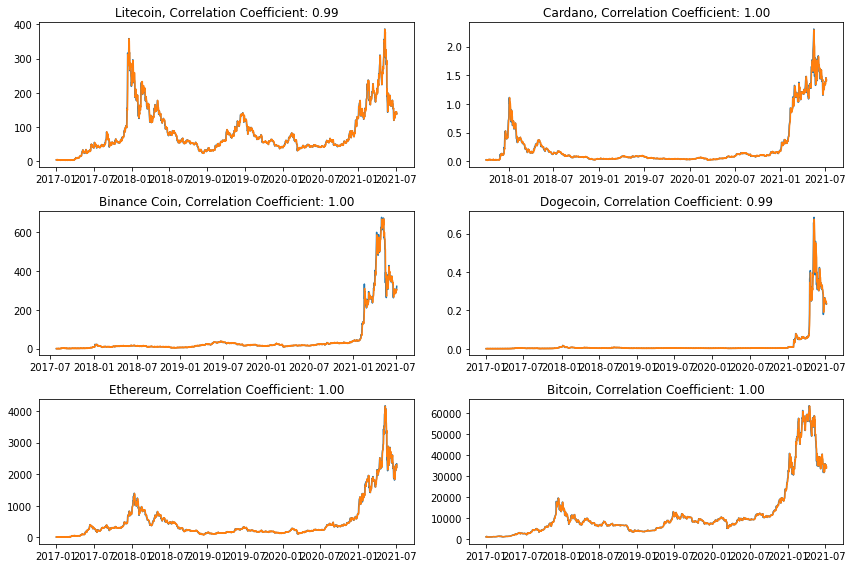

In [33]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings

# Load data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'])

# Create a copy of the DataFrame
df_copy = df.copy()

# Set the index of the copied DataFrame to a DatetimeIndex with daily frequency
df_copy.set_index('Date', inplace=True)
df_copy.index = pd.DatetimeIndex(df_copy.index)

# Convert DatetimeIndex to PeriodIndex with daily frequency
df_copy.index = pd.PeriodIndex(df_copy.index, freq='D')

# Define function to calculate ES model
def calc_es_model(data):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        model = ExponentialSmoothing(data)
        fit = model.fit()
    mse = ((fit.resid ** 2).sum()) / len(fit.resid)
    mae = fit.resid.abs().sum() / len(fit.resid)
    mape = ((fit.resid.abs() / data) * 100).sum() / len(fit.resid)
    corr_coef = np.corrcoef(data, fit.fittedvalues)[0][1]
    return {'MSE': mse, 'MAE': mae, 'MAPE': mape, 'Correlation Coefficient': corr_coef}

# Calculate ES model for each currency
results = {}
for currency in df_copy['Name'].unique():
    currency_data = df_copy.loc[df_copy['Name'] == currency]['Close']
    results[currency] = calc_es_model(currency_data)

# Display results in table
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Currency'
print(results_df)

# Apply SE model to each currency's time series data
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

for i, currency in enumerate(df_copy['Name'].unique()):
    currency_data = df_copy.loc[df_copy['Name'] == currency]['Close']
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        se_model = ExponentialSmoothing(currency_data, seasonal_periods=12, trend='add', seasonal='add').fit()
    axs[i].plot(currency_data.index.to_timestamp(), currency_data, label='Actual')
    axs[i].plot(currency_data.index.to_timestamp(), se_model.fittedvalues, label='Fitted')
    corr_coef = np.corrcoef(currency_data, se_model.fittedvalues)[0][1]
    axs[i].set_title(currency + ', Correlation Coefficient: {:.2f}'.format(corr_coef))

plt.tight_layout()
plt.show()

### **Time-Series Forecasting- ARIMA**

In [40]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load the data from a CSV file
df_Arima = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = df_Arima[df_Arima['Symbol'] == symbol].copy()
    
    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)
    
    # Fit a SARIMAX model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), trend='c')
    results = model.fit()
    
    # Add the model to the dictionary
    models[symbol] = results

# Print the summary output for all models
for symbol, result in models.items():
    print(f"Summary for {symbol}:")
    print(result.summary())
    print("="*60)

Summary for LTC:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1648
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5786.431
Date:                Sun, 12 Mar 2023   AIC                          11580.862
Time:                        16:17:02   BIC                          11602.489
Sample:                    01-01-2017   HQIC                         11588.881
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1440      0.381      0.378      0.705      -0.602       0.891
ar.L1         -0.7702      0.068    -11.398      0.000      -0.903      -0.638
ma.L1          0.7306      0.071   

In [39]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = data[data['Symbol'] == symbol]
    
    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)
    
    # Fit a SARIMAX model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), trend='c')
    results = model.fit()
    
    # Add the model to the dictionary
    models[symbol] = results

# Create an empty DataFrame for the report
report = pd.DataFrame(columns=['Cryptocurrency', 'ARIMA Model', 'Log-likelihood', 'AIC Value', 'Significant Coefficients', 'Correlation Coefficient', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error'])

# Loop through the models and populate the report DataFrame
for symbol, result in models.items():
    ar_coef = result.params['ar.L1']
    ma_coef = result.params['ma.L1']
    if abs(ar_coef) > 0.1 or abs(ma_coef) > 0.1:
        sig_coeffs = 'AR and MA'
    else:
        sig_coeffs = 'None'
    
    # Get the actual and predicted values
    actual = result.resid + result.fittedvalues
    predicted = result.predict(start=1, end=len(actual))
    
    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(actual, predicted)[0,1]
    
    # Calculate the mean absolute error
    mae = np.mean(np.abs(actual - predicted))
    
    # Calculate the mean squared error
    mse = np.mean((actual - predicted)**2)
    
    # Calculate the root mean squared error
    rmse = np.sqrt(mse)
    
    # Calculate the mean absolute percentage error
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    report = report.append({
        'Cryptocurrency': symbol,
        'ARIMA Model': 'SARIMAX(1,1,1)',
        'Log-likelihood': result.llf,
        'AIC Value': result.aic,
        'Significant Coefficients': sig_coeffs,
        'Correlation Coefficient': corr_coef,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Percentage Error': mape
    }, ignore_index=True)

# Print the report
print(report)


  Cryptocurrency     ARIMA Model  Log-likelihood     AIC Value  \
0            LTC  SARIMAX(1,1,1)    -5786.431185  11580.862369   
1            ADA  SARIMAX(1,1,1)     2485.018448  -4962.036896   
2            BNB  SARIMAX(1,1,1)    -5451.449298  10910.898596   
3           DOGE  SARIMAX(1,1,1)     4980.181695  -9952.363390   
4            ETH  SARIMAX(1,1,1)    -8921.347208  17850.694416   
5            BTC  SARIMAX(1,1,1)   -13323.819930  26655.639861   

  Significant Coefficients  Correlation Coefficient  Mean Absolute Error  \
0                AR and MA                 0.999971             3.879523   
1                AR and MA                 0.999818             0.014875   
2                AR and MA                 0.999782             2.938656   
3                AR and MA                 0.999769             0.002203   
4                AR and MA                 0.999846            22.211782   
5                AR and MA                 0.999986           366.746974   

   M

### **Time-Series Forecasting -Seasonal Autoregressive Integrated Moving Average (SARIMA)**

In [41]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load the data from a CSV file
df_Sarima = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = df_Sarima[df_Sarima['Symbol'] == symbol].copy()

    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)

    # Fit a SARIMA model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')
    results = model.fit()

    # Add the model to the dictionary
    models[symbol] = results

# Print the summary output for all models in a single window
for symbol, result in models.items():
    print(f"Summary for {symbol}:")
    print(result.summary())
    print("="*60)

Summary for LTC:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1648
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -5777.085
Date:                            Sun, 12 Mar 2023   AIC                          11564.169
Time:                                    16:20:09   BIC                          11591.166
Sample:                                01-01-2017   HQIC                         11574.183
                                     - 07-06-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0011      0.009     -0.128      0.898      -0.019       0.016
ar.L1         -0.7

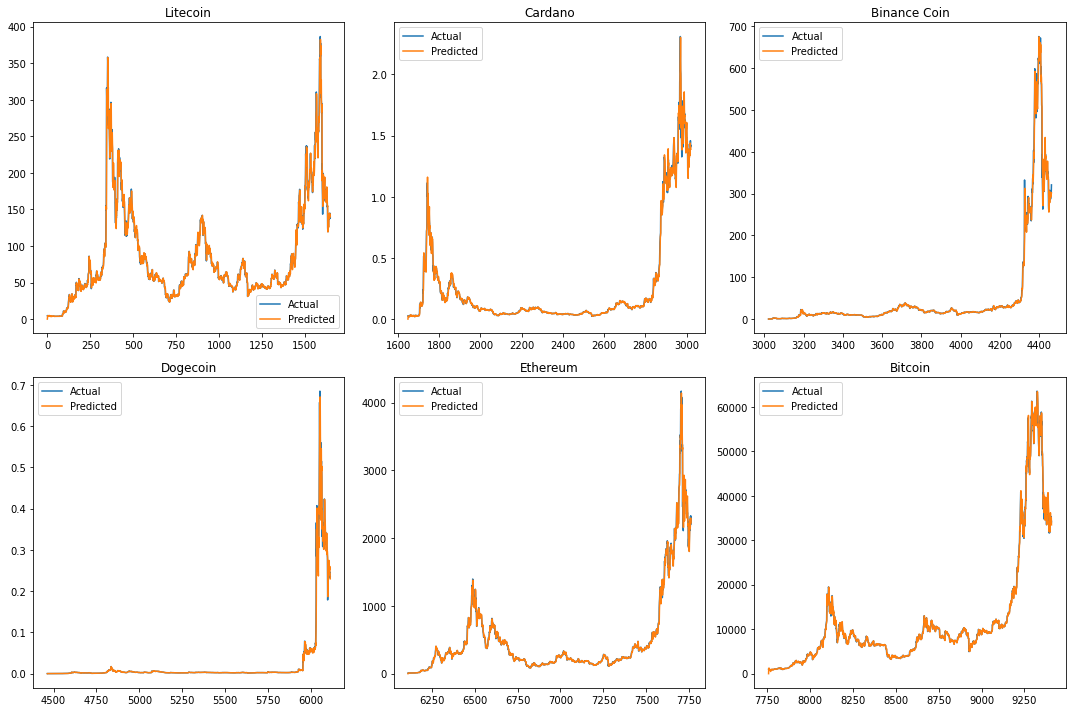

  Cryptocurrency                          Model  Log Likelihood           AIC  \
0       Litecoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -5733.000672  11478.001343   
1        Cardano  SARIMAX(2, 1, 1)(1, 0, 1, 12)     2482.816162  -4953.632323   
2   Binance Coin  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -5384.207394  10780.414789   
3       Dogecoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)     4961.582162  -9911.164323   
4       Ethereum  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -8846.138502  17704.277003   
5        Bitcoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)   -13195.006028  26402.012055   

            BIC     ar.L1     ar.L2     ma.L1  ar.S.L12  ma.S.L12  \
0  11510.390388 -0.777610  0.012926  0.748350  0.601053 -0.711994   
1  -4922.345297 -0.424859  0.138430  0.336157 -0.679719  0.519948   
2  10811.994766  0.244748  0.227471 -0.431803 -0.404084  0.282567   
3  -9878.775279  0.579499  0.121633 -1.453728  0.542910 -0.730959   
4  17736.666048 -0.050391  0.128747 -0.083529 -0.251386  0.134350   
5  26434.401100  0

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = pd.read_csv('sixcrypto.csv')

# Define a list of cryptocurrencies
cryptos = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Cryptocurrency', 'Model', 'Log Likelihood', 'AIC', 'BIC', 'ar.L1', 'ar.L2', 'ma.L1', 'ar.S.L12', 'ma.S.L12', 'sigma2'])

# Loop over each cryptocurrency and fit a SARIMA model
for i, crypto in enumerate(cryptos):
    # Select the rows corresponding to the current cryptocurrency
    crypto_data = data[data['Name'] == crypto]
    
    # Specify the order of the SARIMA model
    order = (2, 1, 1)
    
    # Specify the seasonal order
    seasonal_order = (1, 0, 1, 12)
    
    # Fit the SARIMA model
    model = SARIMAX(crypto_data['Close'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    
    # Extract the relevant information from the results object
    log_likelihood = results.llf
    aic = results.aic
    bic = results.bic
    ar_l1 = results.params['ar.L1']
    ar_l2 = results.params['ar.L2']
    ma_l1 = results.params['ma.L1']
    ar_s_l12 = results.params['ar.S.L12']
    ma_s_l12 = results.params['ma.S.L12']
    mse = results.mse
    
    # Calculate the MAE, RMSE, MAPE, and correlation coefficient
    predictions = results.predict(start=0, end=len(crypto_data)-1)
    actuals = crypto_data['Close']
    mae = (abs(predictions - actuals)).mean()
    rmse = (((predictions - actuals) ** 2).mean()) ** 0.5
    mape = ((abs(predictions - actuals)) / actuals).mean() * 100
    corr = actuals.corr(predictions)
    
    # Add the results to the dataframe
    results_df = results_df.append({
        'Cryptocurrency': crypto,
        'Model': f"SARIMAX{order}{seasonal_order}",
        'Log Likelihood': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'ar.L1': ar_l1,
        'ar.L2': ar_l2,
        'ma.L1': ma_l1,
        'ar.S.L12': ar_s_l12,
        'ma.S.L12': ma_s_l12,
        'sigma2': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Corr': corr
    }, ignore_index=True)
    
    # Plot the SARIMA model
    ax = axs[i//3, i%3]
    ax.plot(crypto_data['Close'], label='Actual')
    ax.plot(predictions, label='Predicted')
    ax.set_title(crypto)
    ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the results dataframe
print(results_df)